# 機器學習作業

1. 資料來源：[https://www.kaggle.com/competitions/boston20200827/](https://www.kaggle.com/competitions/boston20200827/)
2. 要求：
- 完整的機器學習預測流程,包括:資料前處理、視覺化、模型訓練、預測、結果評估等。
- 至少使用兩種模型並比較其效果。

## 資料欄位說明

| 欄位      | 說明                                           |
|-----------|------------------------------------------------|
| ID        | 資料的唯一識別碼。                             |
| CRIM      | 每人均犯罪率。                                 |
| ZN        | 佔地面積超過 25,000 平方英尺的住宅用地比例。   |
| INDUS     | 每鎮非零售業務用地的比例。                     |
| CHAS      | 查爾斯河虛擬變數（= 1 如果地段鄰近河流；否則為 0）。|
| NOX       | 一氧化氮濃度（每 10 百萬分之一）。             |
| RM        | 每棟住宅的平均房間數。                         |
| AGE       | 1940 年之前建造的自住單位比例。                 |
| DIS?      | 到波士頓五個就業中心的加權平均距離。           |
| RAD       | 到放射狀公路的可達性指數。                     |
| TAX       | 每 10,000 美元的房產稅率。                     |
| PTRATIO   | 每個城鎮的學生與教師比例。                     |
| B 1000    | 1000(Bk - 0.63)^2，其中 Bk 是鎮上黑人比例。    |
| LSTAT     | 低收入人口的比例（百分比）。                   |
| PRICE     | 自住單位的中位數價格（以千美元計）。           |


推測自：

[https://www.kaggle.com/competitions/boston-dataset/data?select=boston_data.csv](https://www.kaggle.com/competitions/boston-dataset/data?select=boston_data.csv)

[https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data](https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data)


### 我找出的資料發現

1. **CHAS 比 ID 更應該被去除**

    - CHAS: 查爾斯河虛擬變數（= 1 如果地段鄰近河流；否則為 0）
    - ID: 資料的唯一識別碼。
    - 經SelectKBest選擇後，CHAS的分數比ID還低。
        - ID: 13.741949010190039
        - CHAS: 2.1970503543846425



## 載入資料

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [97]:
Boston_train_df = pd.read_csv(r'./boston20200827/Boston_train.csv')
Boston_test_df = pd.read_csv(r'./boston20200827/Boston_test.csv')
df = pd.concat([Boston_train_df, Boston_test_df], sort=False)

df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,RAD,TAX,PTRATIO,B 1000,LSTAT,PRICE
0,400,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666,20.2,338.16,29.97,6.3
1,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
2,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
3,398,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
4,430,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5


In [98]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,RAD,TAX,PTRATIO,B 1000,LSTAT,PRICE
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,352.000000
mean,234.311947,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,19.915625
std,142.775660,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,4.145414
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,113.750000,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,17.375000
50%,226.500000,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,20.300000
75%,339.250000,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,23.000000
max,506.000000,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,28.400000


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 99
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       452 non-null    int64  
 1   CRIM     452 non-null    float64
 2   ZN       452 non-null    float64
 3   INDUS    452 non-null    float64
 4   CHAS     452 non-null    int64  
 5   NOX      452 non-null    float64
 6   RM       452 non-null    float64
 7   AGE      452 non-null    float64
 8   DIS?     452 non-null    float64
 9   RAD      452 non-null    int64  
 10  TAX      452 non-null    int64  
 11  PTRATIO  452 non-null    float64
 12  B 1000   452 non-null    float64
 13  LSTAT    452 non-null    float64
 14  PRICE    352 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 56.5 KB
None


## 資料視覺化

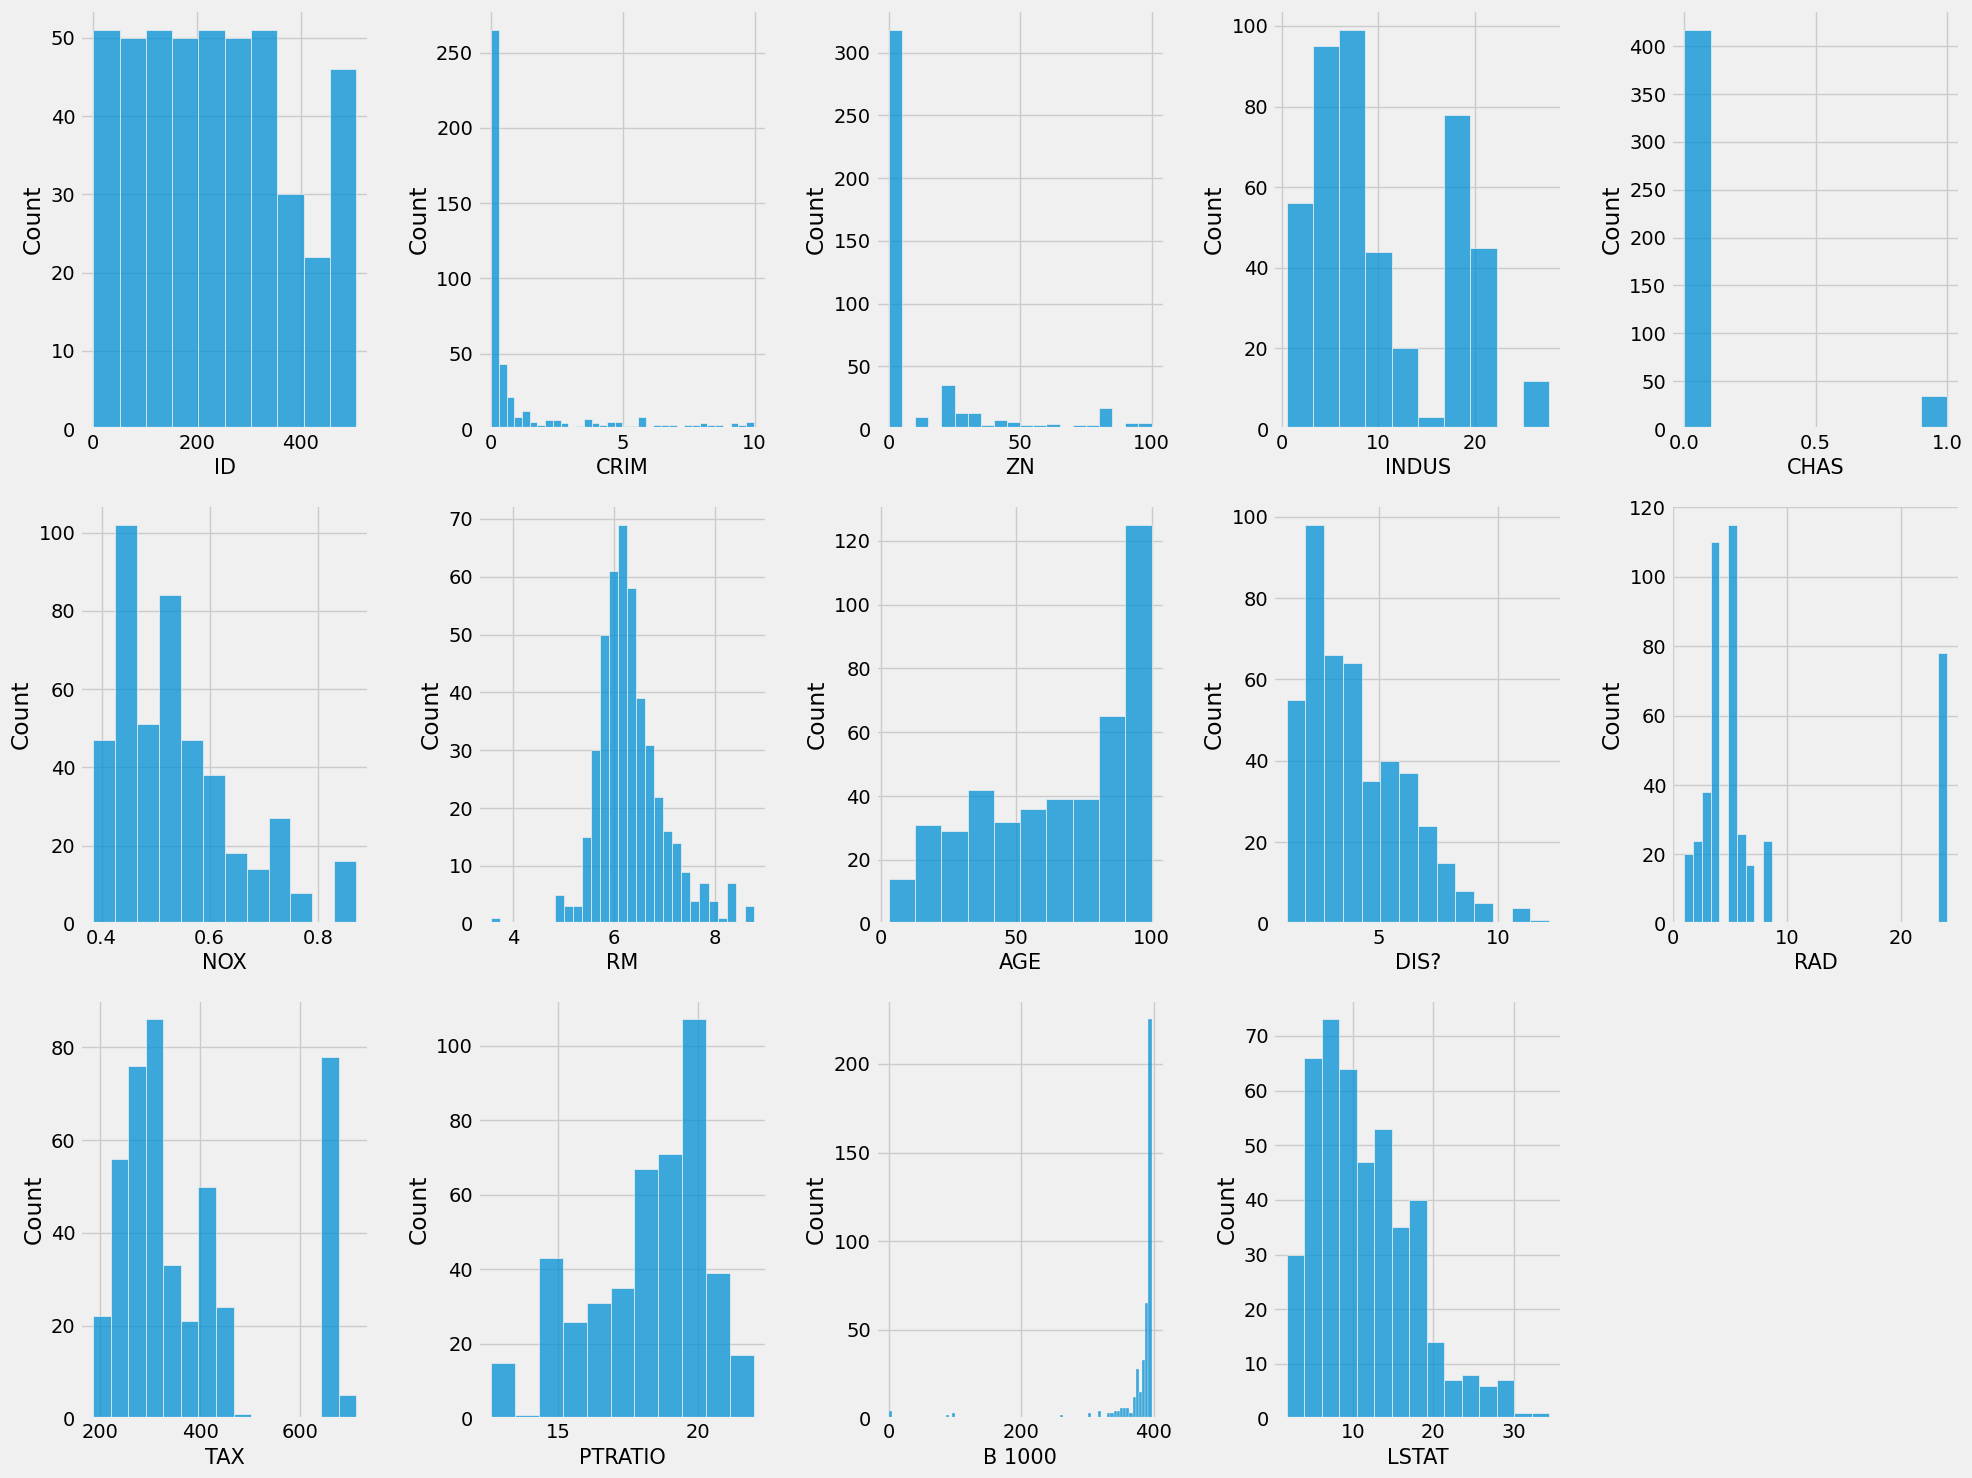

In [100]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

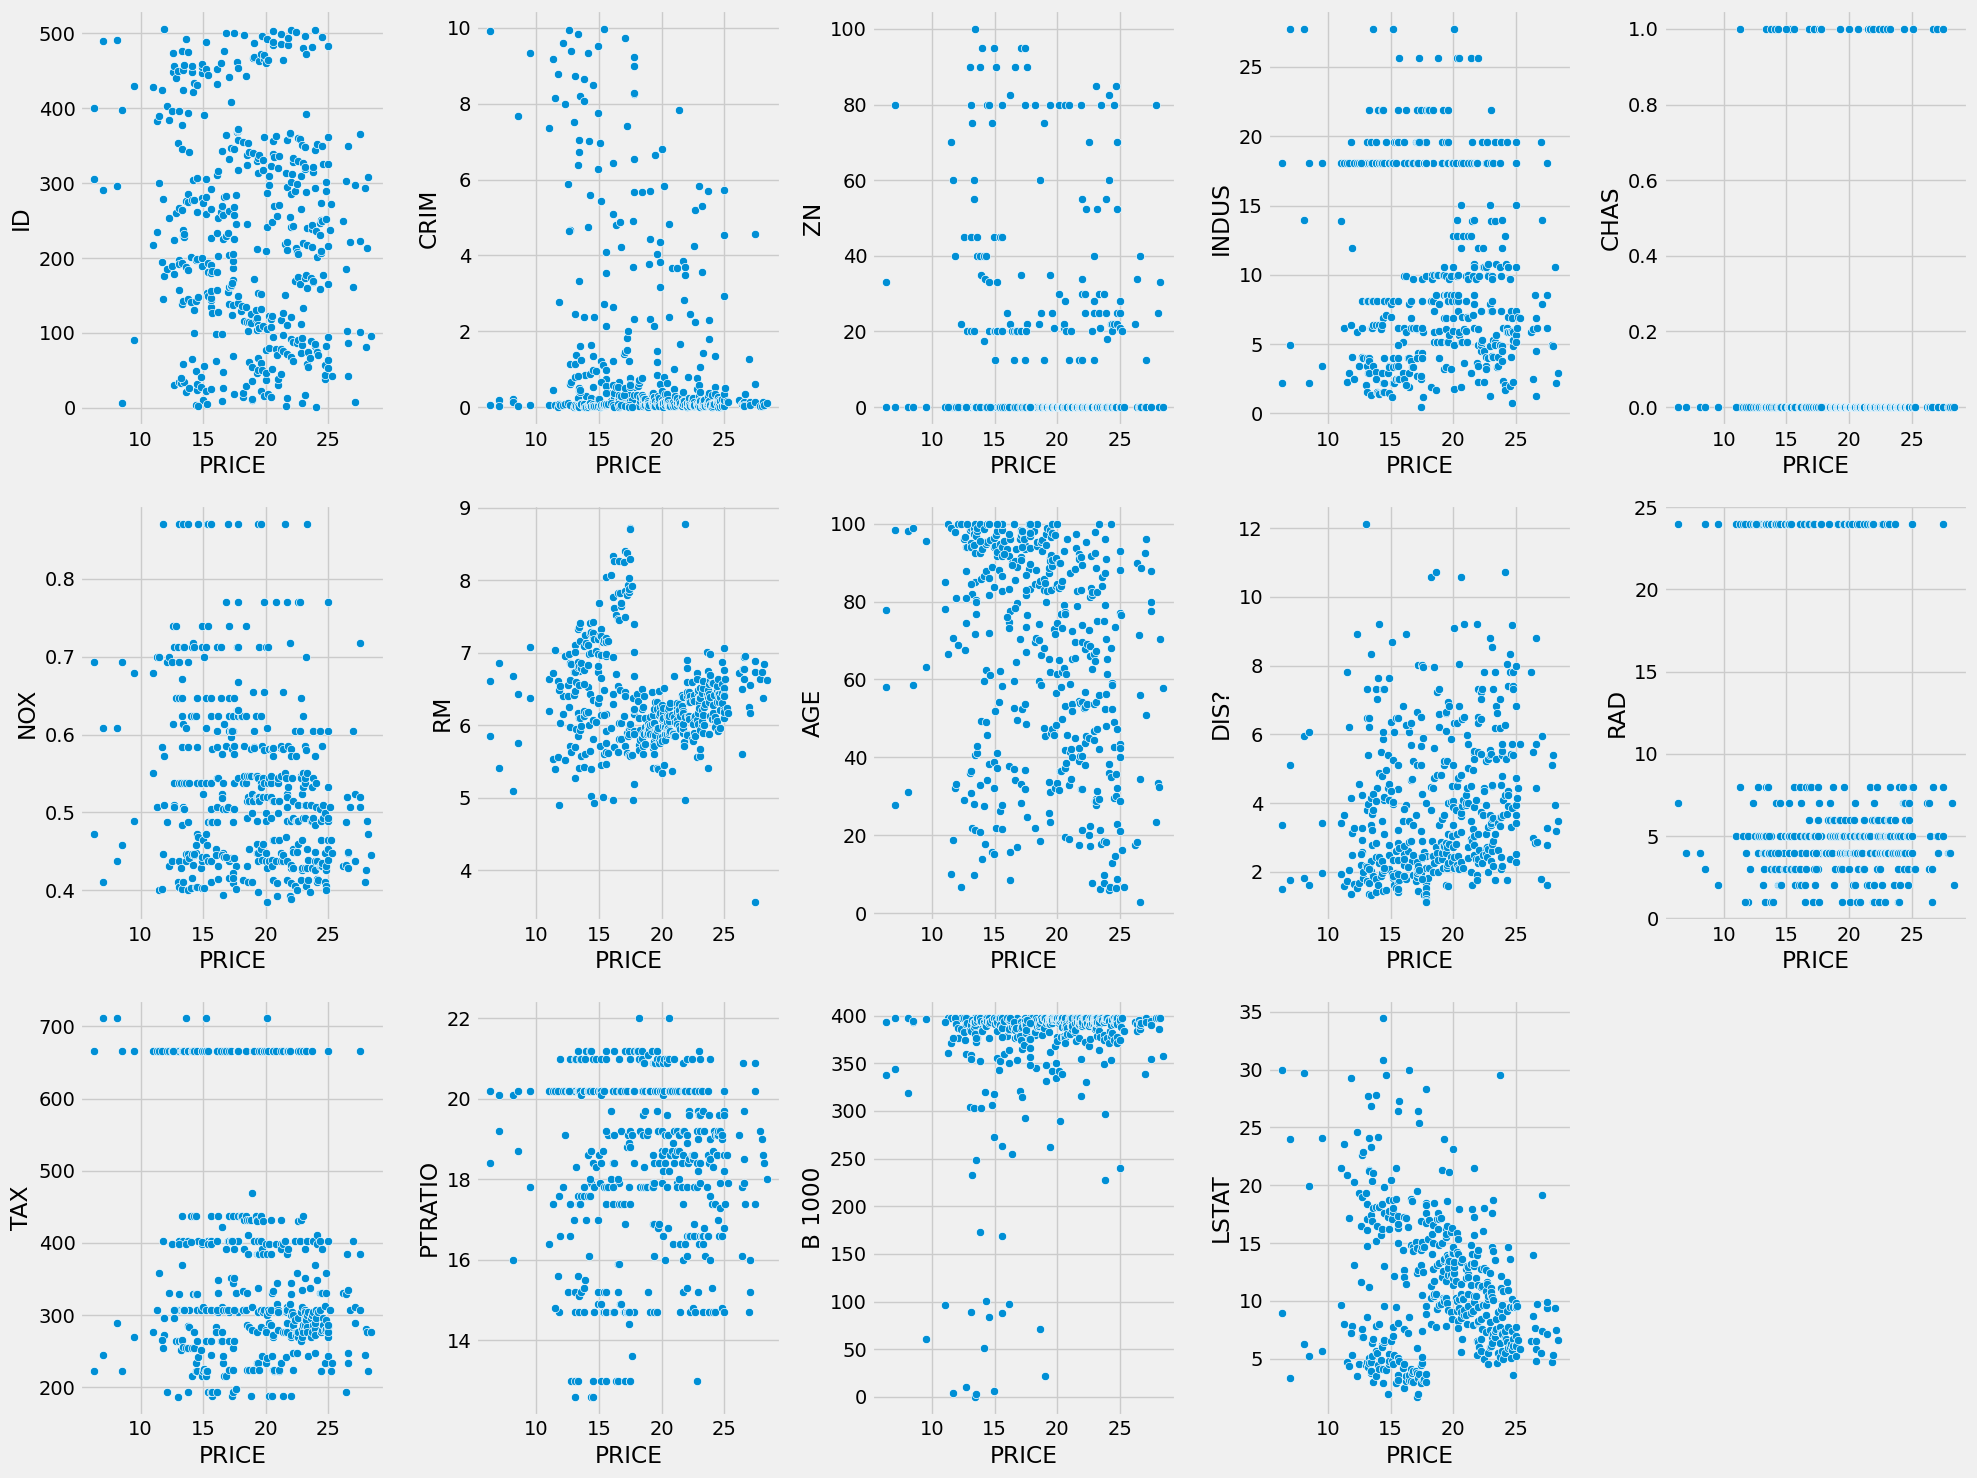

In [101]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['PRICE'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

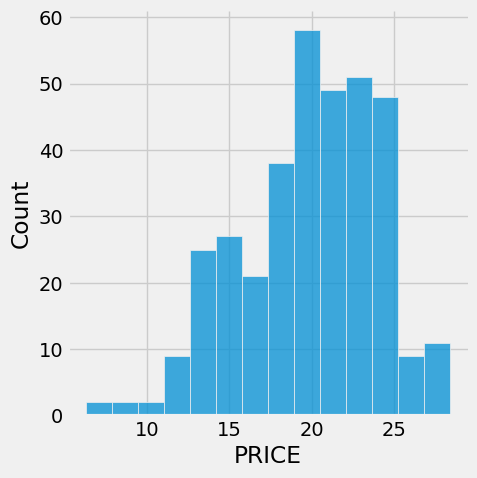

In [102]:
sns.displot(df['PRICE'])
plt.show()

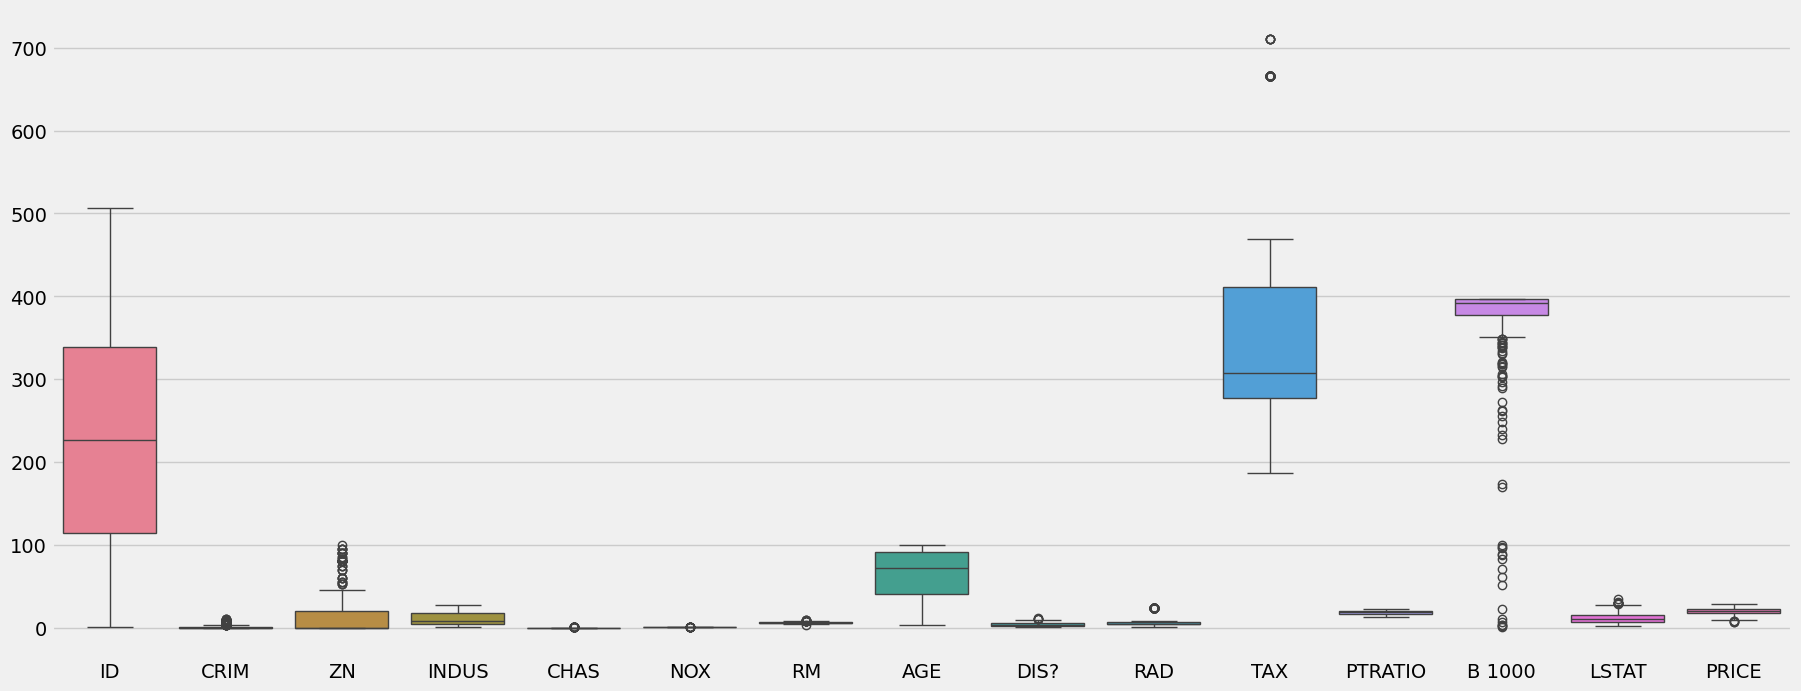

In [103]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

## 資料前處理

In [104]:
df.isnull().sum()

ID           0
CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS?         0
RAD          0
TAX          0
PTRATIO      0
B 1000       0
LSTAT        0
PRICE      100
dtype: int64

模型的目標是預測房價（PRICE），因此缺少目標值的數據對於訓練模型來說是沒有意義的。

這些缺失目標值的樣本無法提供有用的信息來幫助模型學習，因此應該將它們從訓練數據中移除。

In [105]:
df = df.dropna(subset=['PRICE'])
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS?       0
RAD        0
TAX        0
PTRATIO    0
B 1000     0
LSTAT      0
PRICE      0
dtype: int64

In [106]:
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

### 異常值處理

There are some outliers in data, so StandardScaler can help in scaling data.

In [107]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.05019991,  3.11906209, -0.42789135, ...,  0.74334373,
        -0.34539634,  2.89985829],
       [ 1.63279631, -0.5505427 , -0.42789135, ...,  0.69201831,
        -0.26853013,  1.86497162],
       [ 1.63926961, -0.54146029, -0.42789135, ...,  0.69201831,
        -0.60287859,  2.84983877],
       ...,
       [-0.15383267, -0.56669802, -0.42789135, ..., -0.077863  ,
         0.27645002, -0.6515278 ],
       [ 0.45465691, -0.60108225,  1.32039775, ..., -0.18051384,
         0.42117775, -0.97061786],
       [-0.91768129, -0.57366535, -0.42789135, ..., -0.38581552,
        -0.08673958, -1.12240123]])

### 檢查多重共線性

- 不穩定的係數估計：當自變數之間高度相關時，回歸係數的估計值會變得不穩定，可能會出現很大的標準誤差。
- 解釋困難：高度相關的自變數使得很難確定哪個變數對應變數有實質性的影響。
- 顯著性檢驗失效：多重共線性會導致 t 檢驗和 F 檢驗的結果不可靠。

1. **相關矩陣（Correlation Matrix）**：
   - 計算自變數之間的相關係數。如果某些變數之間的相關係數接近 1 或 -1，則可能存在多重共線性。
   - 例如，相關係數大於 0.8 或小於 -0.8 可能表明存在多重共線性。

2. **變異膨脹因子（Variance Inflation Factor, VIF）**：
   - VIF 衡量一個變數與其他所有變數之間的線性相關程度。
   - 一般來說，VIF 值超過 10 被認為存在較強的多重共線性，但這個閾值有時也會設定為 5。
   - 計算 VIF 的公式是 \( \text{VIF}(X_i) = \frac{1}{1 - R_i^2} \)，其中 \( R_i^2 \) 是用其他變數來解釋變數 \( X_i \) 的決定係數。

3. **特徵值分解（Eigenvalue Decomposition）**：
   - 通過對設計矩陣 \(X^TX\) 進行特徵值分解來檢查多重共線性。如果某些特徵值非常小，則表明存在多重共線性。

4. **條件數（Condition Number）**：
   - 條件數是特徵值分解的一種度量。條件數大於 30 通常被認為存在多重共線性。

### 如何處理多重共線性？

1. **移除相關性高的變數**：如果兩個變數之間的相關性非常高，可以考慮移除其中一個變數。
2. **合併變數**：將高度相關的變數合併成一個新的變數，例如通過主成分分析（PCA）。
3. **正則化方法**：使用正則化回歸方法，如嶺回歸（Ridge Regression）或套索回歸（Lasso Regression），這些方法可以減少多重共線性的影響。


In [108]:
# checking for multicollinearity using `VIF` and `correlation matrix`

# from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.871172,ID
1,6.930782,CRIM
2,2.245472,ZN
3,3.322315,INDUS
4,1.126877,CHAS
5,4.168552,NOX
6,1.506239,RM
7,2.915360,AGE
8,4.552616,DIS?
9,9.789902,RAD


In [109]:
# dropping 'RAD' column from data

X.drop(columns = ['RAD'], axis = 1)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,TAX,PTRATIO,B 1000,LSTAT
0,400,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,666,20.2,338.16,29.97
1,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,711,20.1,344.05,23.97
2,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,711,20.1,318.43,29.68
3,398,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,666,20.2,393.10,19.92
4,430,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,666,20.2,60.72,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,293,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,245,19.2,396.90,4.70
348,81,0.04113,25.0,4.86,0,0.426,6.727,33.5,5.4007,281,19.0,396.90,5.29
349,214,0.14052,0.0,10.59,0,0.489,6.375,32.3,3.9454,277,18.6,385.81,9.38
350,308,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,222,18.4,396.90,7.53


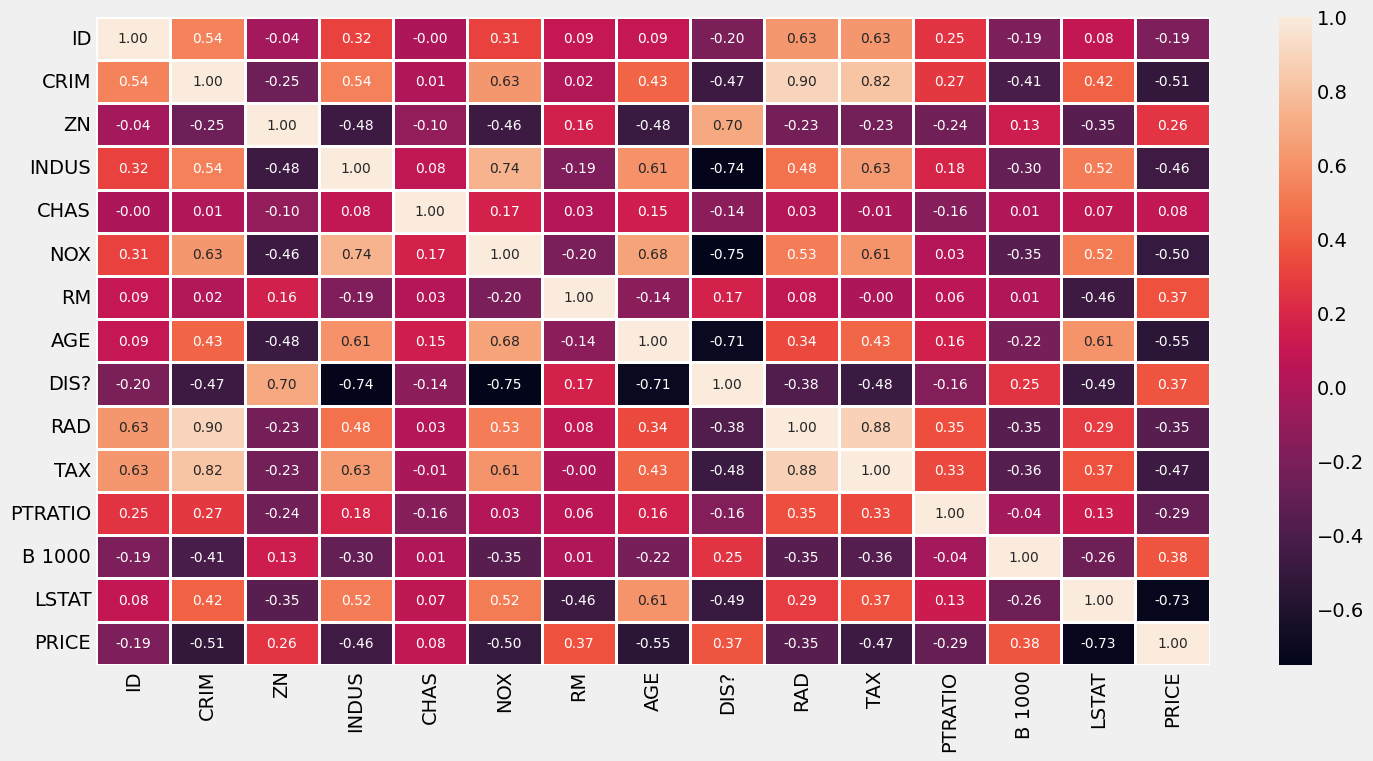

In [110]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

RAD 和 TAX 之間的相關性很高，因此我們可以考慮移除其中一個變數。

In [111]:
# removing `RAD` column from data
df = df.drop(columns = ['RAD'], axis = 1)
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS?,TAX,PTRATIO,B 1000,LSTAT,PRICE
0,400,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,666,20.2,338.16,29.97,6.3
1,490,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,711,20.1,344.05,23.97,7.0
2,491,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,711,20.1,318.43,29.68,8.1
3,398,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,666,20.2,393.10,19.92,8.5
4,430,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,666,20.2,60.72,24.08,9.5


## 拆分訓練集和測試集

In [112]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

## 開始訓練模型

### 模型：Linear Regression

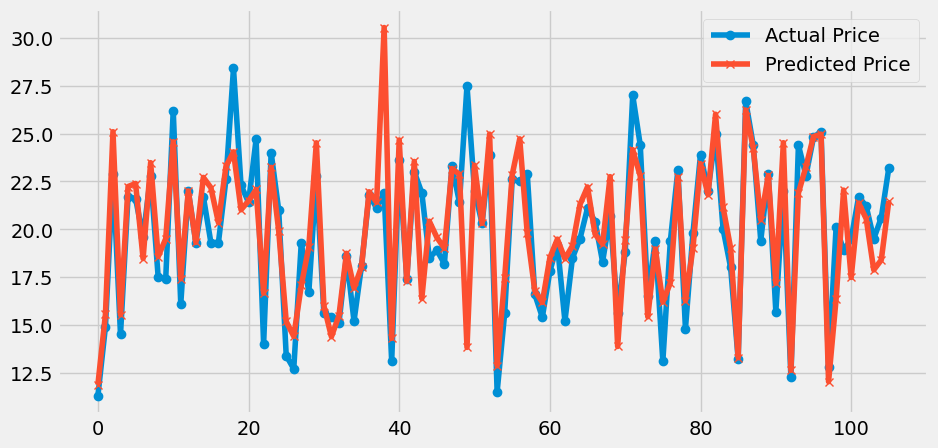

Accuracy of the model: 0.6553651725033762


In [113]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# 使用驗證集進行預測
y_pred = lm.predict(X_test)

# 結果可視化
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, marker='o', label='Actual Price')
plt.plot(y_pred, marker='x', label='Predicted Price')
plt.legend()
plt.show()

# test accuracy of the model
print('Accuracy of the model:', lr.score(X_test, y_test))

## 評估模型的好壞

### 回歸模型的評估指標

1. **MSE (Mean Squared Error) - 均方誤差**

   - **解釋**：MSE 是預測值與真實值之間平方誤差的平均值。它反映了模型預測誤差的平方平均值。
   - **意義**：MSE 對於較大的誤差更加敏感，因為誤差被平方了。MSE 越小，表示模型的預測越準確。

2. **MAE (Mean Absolute Error) - 平均絕對誤差**

   - **解釋**：MAE 是預測值與真實值之間絕對誤差的平均值。
   - **意義**：MAE 是一個容易解釋的指標，因為它表示了平均預測誤差的實際值。MAE 越小，表示模型的預測越準確。

3. **RMSE (Root Mean Squared Error) - 均方根誤差**

   - **解釋**：RMSE 是 MSE 的平方根，提供了一個與原始數據單位相同的誤差指標。
   - **意義**：RMSE 與 MSE 類似，但由於它取了平方根，因此與原始數據的尺度一致。RMSE 越小，表示模型的預測越準確。

4. **MAPE (Mean Absolute Percentage Error) - 平均絕對百分比誤差**

   - **解釋**：MAPE 是預測值與真實值之間相對誤差的平均值，通常以百分比表示。
   - **意義**：MAPE 提供了預測誤差的相對尺度，這對於不同量級的數據特別有用。MAPE 越小，表示模型的預測越準確。

#### 綜合理解：
- **MSE** 和 **RMSE** 對於較大的誤差更加敏感，因此它們能夠突出模型在大誤差情況下的性能。
- **MAE** 提供了一個直觀的平均誤差值，易於解釋和理解。
- **MAPE** 提供了預測誤差的相對尺度，特別適合於不同量級的數據比較。

In [114]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('MSE(Mean Square Error):',mean_absolute_error(y_test,y_pred)) #計算 MAE
print('MAE(Mean Absolute Error):',mean_squared_error(y_test,y_pred)) #計算 MSE
print('RMSE(Root Mean Square Error):',np.sqrt(mean_squared_error(y_test,y_pred))) #計算 RMSE
print('MAPE(Mean Absolute Percentage Error):',mean_absolute_percentage_error(y_test,y_pred)) #計算 MAPE 

MSE(Mean Square Error): 1.42578484867176
MAE(Mean Absolute Error): 4.999641612326563
RMSE(Root Mean Square Error): 2.2359878381437057
MAPE(Mean Absolute Percentage Error): 0.07257987929196319


In [115]:
# from sklearn.model_selection import cross_val_score

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [116]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.655365,0.602344,0.645566,2.235988


## 模型：Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [118]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [119]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.803959,0.773799,0.646738,1.686408


## 模型：Ridge Regression

In [120]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

In [121]:
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [122]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.657568,0.604886,0.647941,2.228832


## 模型：XGBoost

In [123]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [124]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [125]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.803687,0.773485,0.66102,1.687581


## 模型：Recursive Feature Elimination (RFE)

RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

Random Forest has usually good performance combining with RFE

In [126]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [127]:
rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

In [128]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.816878,0.788705,0.654728,1.629899


# 結果比較

In [129]:
predictions = pd.concat([rfe_score, XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.816878,0.788705,0.654728,1.629899
1,XGBoost,0.803687,0.773485,0.661020,1.687581
2,Ridge Regression,0.657568,0.604886,0.647941,2.228832
3,Random Forest,0.803959,0.773799,0.646738,1.686408
4,Linear Regression,0.655365,0.602344,0.645566,2.235988


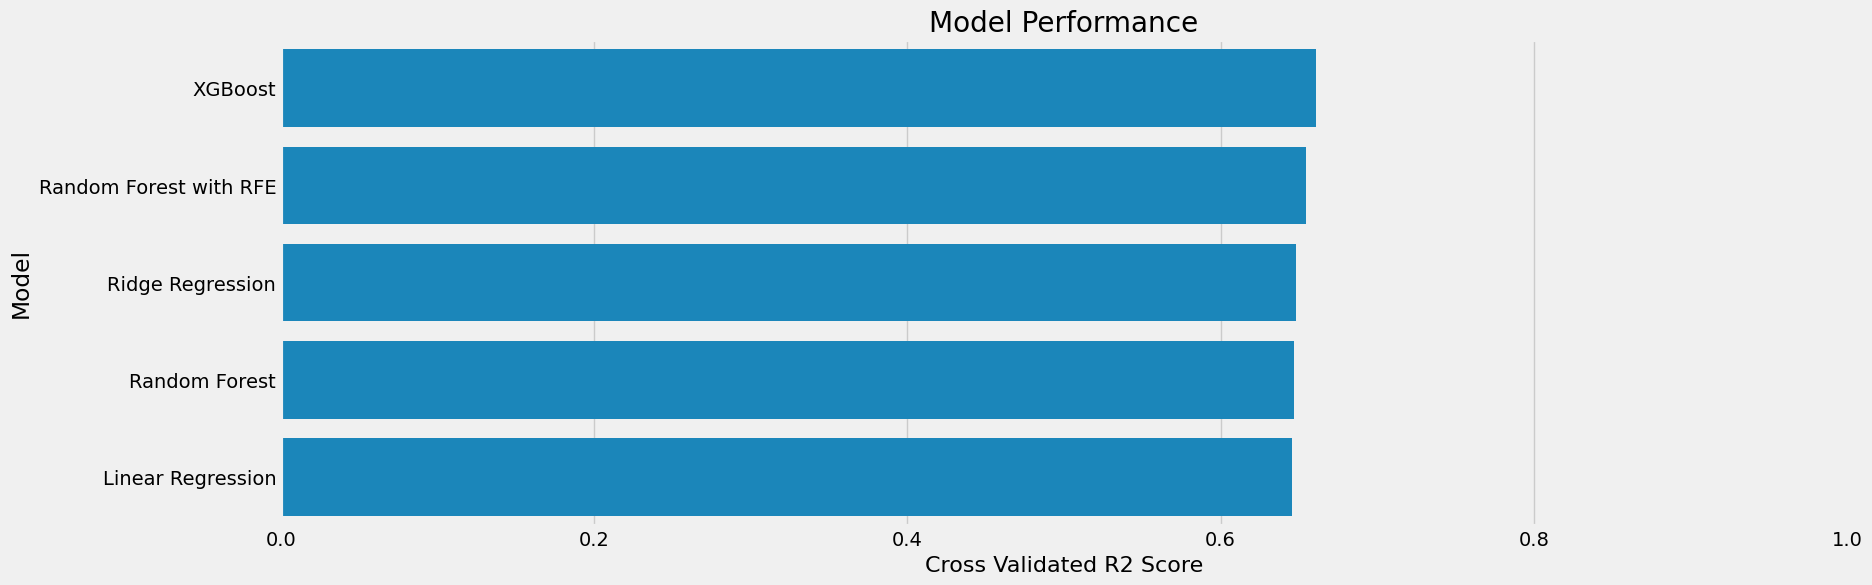

In [130]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance')

plt.show()